# **Alejandro Londoño Valencia - Código 104202425942**
***Actividad individual I Taller***

---

**Parte 1: Carga y Exploración Inicial (Pandas & NumPy)**

**1. Carga de Datos:** Carga el archivo vgsales.csv en un DataFrame de Pandas.

In [3]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta al archivo CSV en tu Google Drive
file_path = '/content/drive/MyDrive/Personal/Docs/vgsales.csv'

# Cargar el archivo CSV
data = pd.read_csv(file_path)

# Cargar el archivo CSV en un DataFrame de Pandas
#from google.colab import drive
#drive.mount(file_path)

# Mostrar las primeras filas del DataFrame para verificar que se haya cargado correctamente
print(data.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


**2. Inspección Básica: **
-	Muestra las primeras 10 filas del DataFrame.
-	Muestra las últimas 5 filas del DataFrame.
-	Obtén información general del DataFrame (tipos de datos, conteo de no nulos) usando .info().
-	Obtén estadísticas descriptivas para las columnas numéricas usando .describe().


In [4]:
# Mostrar las primeras 10 filas del DataFrame
print("Primeras 10 filas del DataFrame:")
print(data.head(10))

# Mostrar las últimas 5 filas del DataFrame
print("\nÚltimas 5 filas del DataFrame:")
print(data.tail(5))

# Obtener información general del DataFrame
print("\nInformación general del DataFrame:")
print(data.info())

# Obtener estadísticas descriptivas para las columnas numéricas
print("\nEstadísticas descriptivas para las columnas numéricas:")
print(data.describe())

Primeras 10 filas del DataFrame:
   Rank                       Name Platform    Year         Genre Publisher  \
0     1                 Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3             Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4          Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
5     6                     Tetris       GB  1989.0        Puzzle  Nintendo   
6     7      New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
7     8                   Wii Play      Wii  2006.0          Misc  Nintendo   
8     9  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo   
9    10                  Duck Hunt      NES  1984.0       Shooter  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77     

**3. Valores Faltantes:**
-	Verifica si hay valores nulos en cada columna y muestra el recuento total de nulos por columna.
-	Opcional (si hay tiempo/interés en limpieza): Decide una estrategia para manejar los valores nulos encontrados (ej. eliminar filas, imputar valores). Si aplicas alguna, justifica tu elección y muestra el DataFrame después del manejo. (Para esta actividad, podrías simplemente identificar cuántos hay y mencionarlo).


In [ ]:
# Verificar valores nulos en cada columna y mostrar el recuento total de nulos por columna
null_counts = data.isnull().sum()
print("Recuento total de valores nulos por columna:")
print(null_counts)

# Se encuentran valores nulos en Year (variable numérica) y en Publisher (variable categórica)

# Se decide imputar valores nulos con la media de la columna, pero no todos los campos son numéricos
# entonces se ejecuta el siguiente proceso para aplicar la imputación solo a ese tipo de campos de la BD

# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Calcular la media de las columnas numéricas
mean_values = numeric_data.mean()

# Imputar valores nulos en las columnas numéricas con la media
data[numeric_data.columns] = data[numeric_data.columns].fillna(mean_values)

# Mostrar el DataFrame después de imputar valores nulos
print("\nDataFrame después de imputar valores nulos con la media en columnas numéricas:")
print(data.head())

# Se vuelve a verificar valores nulos en cada columna y mostrar el recuento total de nulos por columna
null_counts = data.isnull().sum()
print("Recuento total de valores nulos por columna:")
print(null_counts)

Recuento total de valores nulos por columna:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

DataFrame después de imputar valores nulos con la media en columnas numéricas:
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77       

Para la variable numérica Year se imputó la media, pero como Publisher es una variable categórica, se decide eliminar los registros con los valores nulos.

In [ ]:
# Eliminar filas con valores nulos en el campo 'Publisher'
data.dropna(subset=['Publisher'],axis=0,inplace=True)

# Se vuelve a verificar valores nulos en cada columna y mostrar el recuento total de nulos por columna
null_counts = data.isnull().sum()
print("Recuento total de valores nulos por columna:")
print(null_counts)

# Verificar valores nulos en la columna 'Publisher'
null_counts = data['Publisher'].isnull().sum()
print("Número de valores nulos en 'Publisher':", null_counts)

Recuento total de valores nulos por columna:
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
Número de valores nulos en 'Publisher': 0


**4. Tipos de Datos:** Revisa si los tipos de datos asignados por Pandas son apropiados (ej. Year debería ser numérico o tipo fecha si se requiere análisis temporal avanzado, aunque como entero puede ser suficiente para esta actividad). Si encuentras alguna columna con tipo incorrecto (ej. Year como objeto), intenta convertirla al tipo adecuado (ej. numérico). Maneja posibles errores durante la conversión.

In [ ]:
# Verificar los tipos de datos actuales
print("Tipos de datos actuales:")
print(data.dtypes)


Tipos de datos actuales:
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


No se observa inconsistencia en los tipos de datos. Como el objetivo del taller no es realizar operaciones avanzadas con fecha, se resuelve dejar el campo Year con el tipo float64.

**Parte 2: Manipulación y Análisis (Pandas & NumPy)**
**5. Selección y Filtrado: **
-	Crea un nuevo DataFrame que contenga solo los juegos lanzados a partir del año 2010 (inclusive).
-	Filtra el DataFrame original para mostrar solo los juegos del género "Action" publicados por "Nintendo".
-	Selecciona y muestra solo las columnas Name, Platform, Genre, y Global_Sales para los 20 juegos mejor clasificados (columna Rank).


In [ ]:
# Crear un nuevo DataFrame con juegos lanzados a partir del año 2010
juegos_luego_de_2010 = data[data['Year'] >= 2010]

# Mostrar las primeras filas del nuevo DataFrame
print("Juegos lanzados a partir del año 2010:")
print(juegos_luego_de_2010.head())

# Filtrar el DataFrame original para juegos del género "Action" publicados por "Nintendo"
accion_nintendo = data[(data['Genre'] == 'Action') & (data['Publisher'] == 'Nintendo')]

# Mostrar las primeras filas del DataFrame filtrado
print("\nJuegos del género 'Action' publicados por 'Nintendo':")
print(accion_nintendo.head())

# Seleccionar las columnas Name, Platform, Genre, y Global_Sales para los 20 juegos mejor clasificados
top_20_juegos = data.sort_values(by='Rank').head(20)[['Name', 'Platform', 'Genre', 'Global_Sales']]

# Mostrar los 20 juegos mejor clasificados
print("\nTop 20 juegos mejor clasificados:")
print(top_20_juegos)

Juegos lanzados a partir del año 2010:
    Rank                            Name Platform    Year         Genre  \
15    16              Kinect Adventures!     X360  2010.0          Misc   
16    17              Grand Theft Auto V      PS3  2013.0        Action   
23    24              Grand Theft Auto V     X360  2013.0        Action   
26    27     Pokemon Black/Pokemon White       DS  2010.0  Role-Playing   
29    30  Call of Duty: Modern Warfare 3     X360  2011.0       Shooter   

                 Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
15  Microsoft Game Studios     14.97      4.94      0.24         1.67   
16    Take-Two Interactive      7.01      9.27      0.97         4.14   
23    Take-Two Interactive      9.63      5.31      0.06         1.38   
26                Nintendo      5.57      3.28      5.65         0.82   
29              Activision      9.03      4.28      0.13         1.32   

    Global_Sales  
15         21.82  
16         21.40  
23         16.

**6. Agrupación y Agregación:**
-	Agrupa los datos por Genre y calcula la suma total de Global_Sales para cada género. Muestra los resultados ordenados de mayor a menor venta.
-	Agrupa los datos por Publisher y calcula el número de juegos lanzados por cada uno. Muestra los 10 publicadores con más juegos lanzados.
- Calcula las ventas promedio (Global_Sales) por Platform. Muestra las 5 plataformas con mayor venta promedio.


In [ ]:
# Agrupar por Genre y calcular la suma total de Global_Sales
genre_ventas = data.groupby('Genre')['Global_Sales'].sum().reset_index()

# Ordenar los resultados de mayor a menor venta
genre_ventas_ordenadas = genre_ventas.sort_values(by='Global_Sales', ascending=False)

# Mostrar los resultados
print("Suma total de Global_Sales por Género:")
print(genre_ventas_ordenadas)

# Agrupar por Publisher y calcular el número de juegos lanzados
cuenta_publisher = data.groupby('Publisher').size().reset_index(name='Number of Games')

# Ordenar los resultados y mostrar los 10 publicadores con más juegos lanzados
top_publishers = cuenta_publisher.sort_values(by='Number of Games', ascending=False).head(10)

# Mostrar los resultados
print("\nTop 10 Publicadores con más juegos lanzados:")
print(top_publishers)

# Calcular las ventas promedio por Platform
platform_ventas_promedio = data.groupby('Platform')['Global_Sales'].mean().reset_index()

# Ordenar los resultados y mostrar las 5 plataformas con mayor venta promedio
top_platforms_ventas_promedio = platform_ventas_promedio.sort_values(by='Global_Sales', ascending=False).head(5)

# Mostrar los resultados
print("\nTop 5 Plataformas con mayor venta promedio:")
print(top_platforms_ventas_promedio)

Suma total de Global_Sales por Género:
           Genre  Global_Sales
0         Action       1750.33
10        Sports       1329.35
8        Shooter       1037.32
7   Role-Playing        927.31
4       Platform        830.87
3           Misc        802.15
6         Racing        732.03
2       Fighting        445.70
9     Simulation        391.96
5         Puzzle        244.94
1      Adventure        238.77
11      Strategy        174.83

Top 10 Publicadores con más juegos lanzados:
                        Publisher  Number of Games
138               Electronic Arts             1351
21                     Activision              975
347            Namco Bandai Games              932
525                       Ubisoft              921
275  Konami Digital Entertainment              832
488                           THQ              715
359                      Nintendo              703
456   Sony Computer Entertainment              683
446                          Sega              639
49

**7. Creación de Nuevas Columnas (NumPy & Pandas):**
- Crea una nueva columna llamada Total_Regional_Sales que sea la suma de NA_Sales, EU_Sales, JP_Sales, y Other_Sales.
- Verifica si la nueva columna Total_Regional_Sales coincide aproximadamente con Global_Sales (puede haber pequeñas diferencias por redondeo en el dataset original). Puedes usar NumPy para calcular la diferencia absoluta y ver sus estadísticas (.describe()).


In [ ]:
# Crear una nueva columna Total_Regional_Sales
data['Total_Regional_Sales'] = data['NA_Sales'] + data['EU_Sales'] + data['JP_Sales'] + data['Other_Sales']

# Mostrar las primeras filas del DataFrame para verificar la nueva columna
print("DataFrame con la nueva columna Total_Regional_Sales:")
print(data.head())

# Calcular la diferencia absoluta entre Total_Regional_Sales y Global_Sales
data['dif_absoluta'] = np.abs(data['Total_Regional_Sales'] - data['Global_Sales'])

# Mostrar estadísticas de la diferencia absoluta
print("\nEstadísticas de la diferencia absoluta entre Total_Regional_Sales y Global_Sales:")
print(data['dif_absoluta'].describe())


DataFrame con la nueva columna Total_Regional_Sales:
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0     41.49     29.02      3.77         8.46         82.74   
1     29.08      3.58      6.81         0.77         40.24   
2     15.85     12.88      3.79         3.31         35.82   
3     15.75     11.01      3.28         2.96         33.00   
4     11.27      8.89     10.22         1.00         31.37   

   Total_Regional_Sales  
0                 82.74  
1                 40.24  
2                 35.83  
3

Puede evidenciarse que las diferencias entre el nuevo cálculo de Total_Regional_Sales y la sumatoria que ya venía en Global_Sales es extremadamente pequeña.

**Parte 3: Visualización de Datos (Matplotlib & Seaborn)**

**8. Distribución de Ventas Globales (Matplotlib):**
- Crea un histograma de la columna Global_Sales para visualizar su distribución. Ajusta el número de bins si es necesario para una mejor visualización. ¿Qué observas sobre la distribución?


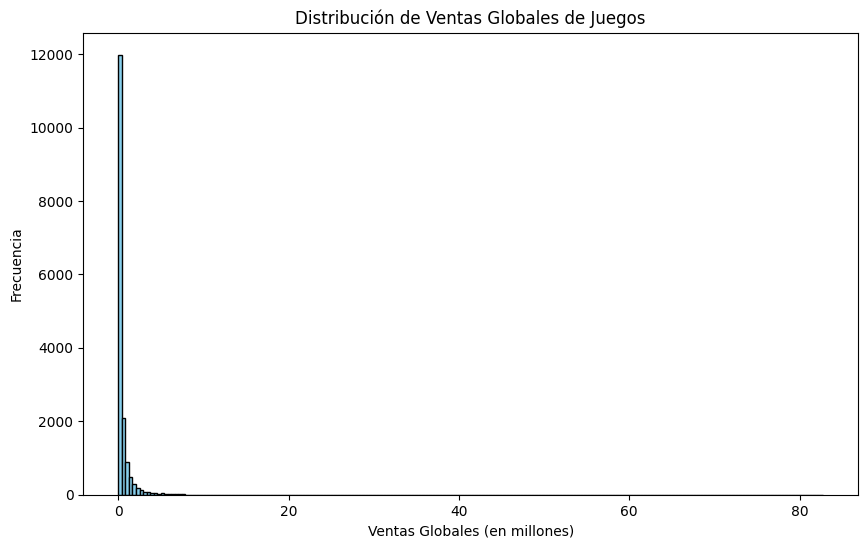

In [ ]:
# Crear un histograma de la columna Global_Sales
plt.figure(figsize=(10, 6))
plt.hist(data['Global_Sales'], bins=200, color='skyblue', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Distribución de Ventas Globales de Juegos')
plt.xlabel('Ventas Globales (en millones)')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

**Interpretación del histograma**

El histograma muestra la **distribución de las ventas globales de videojuegos** (en millones) y la frecuencia con la que ocurren diferentes rangos de ventas.

- La gran mayoría de los juegos tienen ventas globales bajas, principalmente entre 0 y aproximadamente 2 millones.
- Hay una frecuencia muy alta en el primer intervalo (aproximadamente 12,000 juegos), lo que muestra que la mayoría de los juegos vendidos apenas alcanzan ventas que representen un valor alto de ingresos.
- A medida que aumentan las ventas globales, la frecuencia disminuye drásticamente, o sea que muy pocos juegos alcanzan ventas elevadas.
- Existen algunos juegos que excepcionalmente superan los 20, 40 o incluso 80 millones, pero estos casos son extremadamente raros, por lo que constituyen datos atípicos.

**9. Ventas por Género (Seaborn):**

-	Crea un gráfico de barras (usando Seaborn) que muestre las ventas globales totales (Global_Sales) para cada Genre. Ordena las barras de mayor a menor.


<ipython-input-11-c714c75023d3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_ordenadas, x='Genre', y='Global_Sales', palette='viridis')


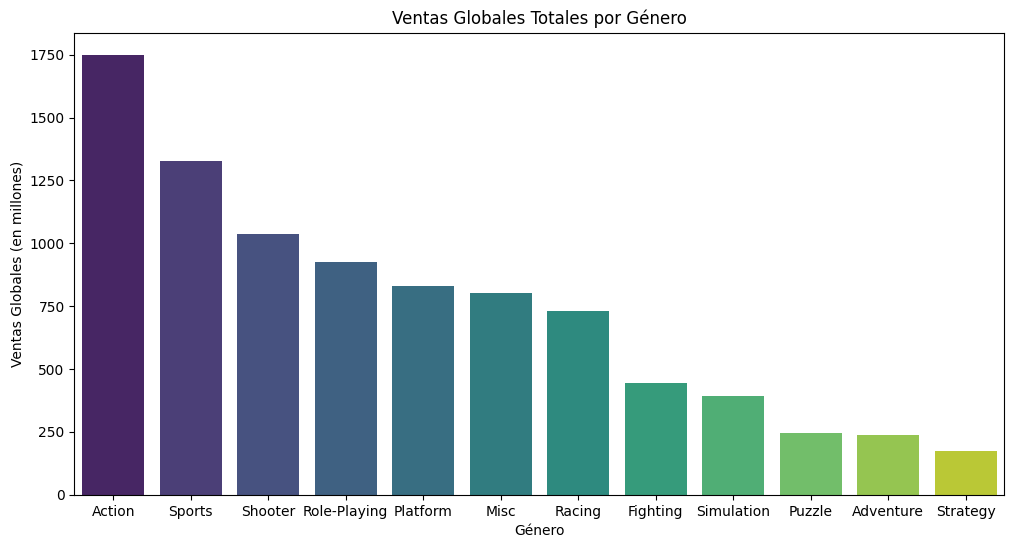

In [ ]:
# Agrupar los datos por Genre y calcular la suma total de Global_Sales
ventas_por_genero = data.groupby('Genre')['Global_Sales'].sum().reset_index()

# Ordenar los resultados de mayor a menor venta
ventas_ordenadas = ventas_por_genero.sort_values(by='Global_Sales', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=ventas_ordenadas, x='Genre', y='Global_Sales', palette='viridis')

# Añadir títulos y etiquetas
plt.title('Ventas Globales Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Globales (en millones)')

# Mostrar el gráfico
plt.show()


**Interpretación de la gráfica "Ventas Globales Totales por Género"**

- El género más vendido es *Action* (Acción), con ventas cercanas a los 1.750 millones de unidades.
- Le sigue *Sports* (Deportes), con aproximadamente 1.300 millones de unidades vendidas.
- Los géneros *Shooter* (Disparos), *Role-Playing* (Rol) y *Platform* (Plataformas) también tienen ventas significativas, superando cada uno los 800 millones de unidades.
- Los géneros con ventas intermedias son *Misc* (Misceláneo), *Racing* (Carreras) y *Fighting* (Lucha).
- Los géneros con menor volumen de ventas son *Simulation* (Simulación), *Puzzle* (Rompecabezas), *Adventure* (Aventura) y *Strategy* (Estrategia), siendo este último el de menor venta global.

**10.Relación entre Ventas Regionales (Seaborn):**

-	Crea un scatterplot (gráfico de dispersión) usando Seaborn para visualizar la relación entre NA_Sales y EU_Sales. ¿Parece haber una correlación?


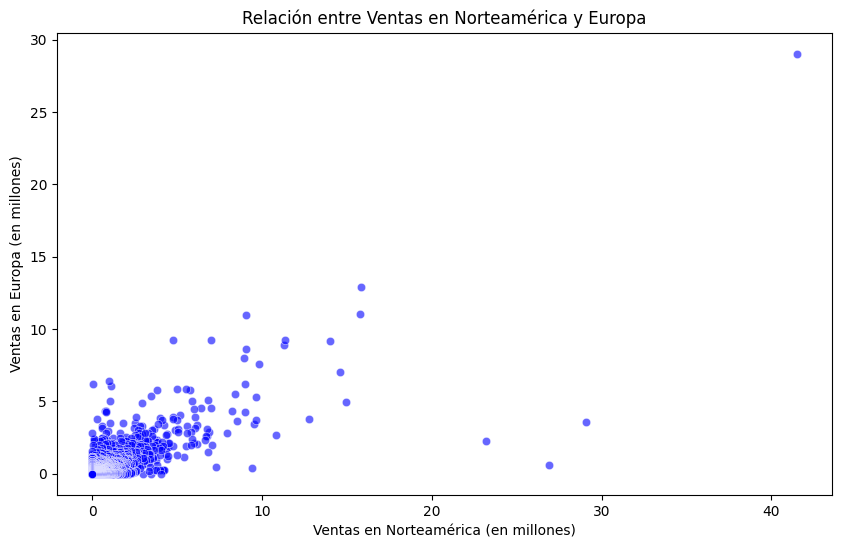

In [ ]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='NA_Sales', y='EU_Sales', alpha=0.6, color='blue')

# Añadir títulos y etiquetas
plt.title('Relación entre Ventas en Norteamérica y Europa')
plt.xlabel('Ventas en Norteamérica (en millones)')
plt.ylabel('Ventas en Europa (en millones)')

# Mostrar el gráfico
plt.show()

**Interpretación del gráfico de correlación**


- La mayoría de los puntos se concentran en valores bajos de ventas, tanto en Norteamérica como en Europa (entre 0 y 10 millones).
- Hay pocos valores extremos, donde algunas observaciones superan los 30 millones en Norteamérica y los 25 millones en Europa.
- Existe una tendencia general: a medida que aumentan las ventas en Norteamérica, también tienden a aumentar las ventas en Europa, aunque la dispersión es considerable.

El gráfico sugiere una correlación positiva entre las ventas en Norteamérica y Europa. Es decir, los productos o casos con mayores ventas en Norteamérica tienden a tener también mayores ventas en Europa.

La correlación no es perfecta. Hay dispersión, especialmente en los valores bajos y medios, lo que indica que aunque existe una tendencia, no es una relación estrictamente lineal.

Se observan varios valores atípicos (outliers), pero hay uno muy extremo en la esquina superior derecha, con ventas mucho mayores en ambos mercados en comparación con el resto de los datos. Esto puede corresponder a un producto extremadamente exitoso en ambas regiones.

**11. Ventas por Plataforma a lo Largo del Tiempo (Seaborn/Matplotlib):**

-	Desafío Opcional: Intenta visualizar cómo han evolucionado las ventas globales totales por año para las 5 plataformas con más ventas históricas. Podrías necesitar agrupar por Year y Platform, sumar Global_Sales, y luego usar un gráfico de líneas (una línea por plataforma). Nota: Esto puede requerir una manipulación de datos más avanzada.


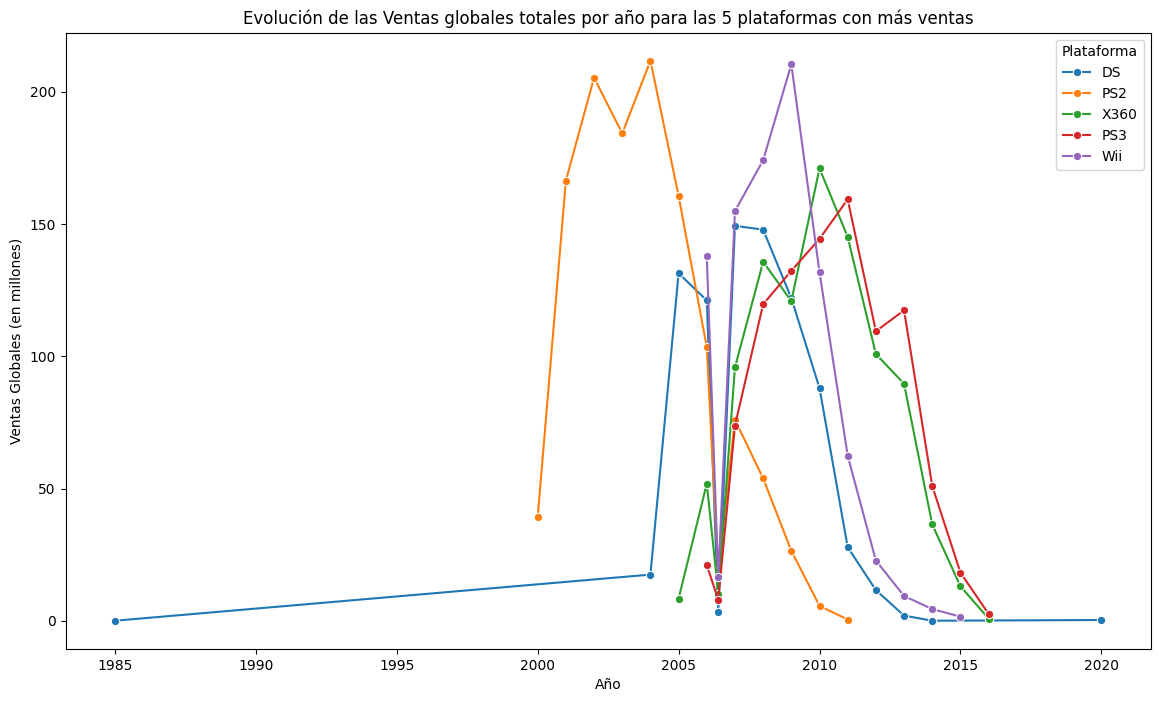

In [ ]:
# Agrupar los datos por Year y Platform, y sumar Global_Sales
platform_year_sales = data.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()

# Obtener las 5 plataformas con más ventas históricas
top_platforms = platform_year_sales.groupby('Platform')['Global_Sales'].sum().nlargest(5).index

# Filtrar los datos para las 5 plataformas con más ventas
top_platforms_data = platform_year_sales[platform_year_sales['Platform'].isin(top_platforms)]

# Crear el gráfico de líneas
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_platforms_data, x='Year', y='Global_Sales', hue='Platform', marker='o')

# Añadir títulos y etiquetas
plt.title('Evolución de las Ventas globales totales por año para las 5 plataformas con más ventas')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (en millones)')
plt.legend(title='Plataforma')

# Mostrar el gráfico
plt.show()


**Interpretación del Gráfico**

- Todas las plataformas muestran un ciclo de vida típico: un inicio con ventas bajas, un pico de ventas y luego una caída hasta desaparecer del mercado.
- La mayoría de estas plataformas tienen su auge entre 2005 y 2012.

**Plataforma DS**
- Comienza antes del 2005 y se extiende hasta cerca del 2017.
- Tiene un crecimiento sostenido, alcanzando su pico alrededor de 2008-2009.

**Plataforma PS2**
- Su ciclo inicia alrededor del año 2000, con un crecimiento muy rápido y un pico alto cerca de 2004-2005.
- Después, sus ventas caen rápidamente.

**Plataforma Wii**
- Tiene un inicio abrupto y un pico muy alto alrededor de 2008-2010.
- Su caída es también bastante rápida después del pico.

**Plataformas X360 y PS3**
- Ambas empiezan a tener relevancia después de 2005.
- Sus picos se dan entre 2009 y 2012, y luego caen de forma similar.

- **PS2 y Wii** muestran los picos más altos de ventas en un solo año.
- **DS** tiene el ciclo de vida más largo, con ventas estables durante más años.
- **X360 y PS3** tienen trayectorias muy similares, reflejando la competencia directa entre ambas.
- Después de 2015, todas las plataformas caen a ventas, lo que indica la decadencia de su ciclo comercial.

**12. Juegos por Año (Matplotlib):**
-	Crea un gráfico de líneas que muestre el número de juegos lanzados por año (Year). Asegúrate de manejar los años inválidos o faltantes si los hubiera (ej., filtrándolos).

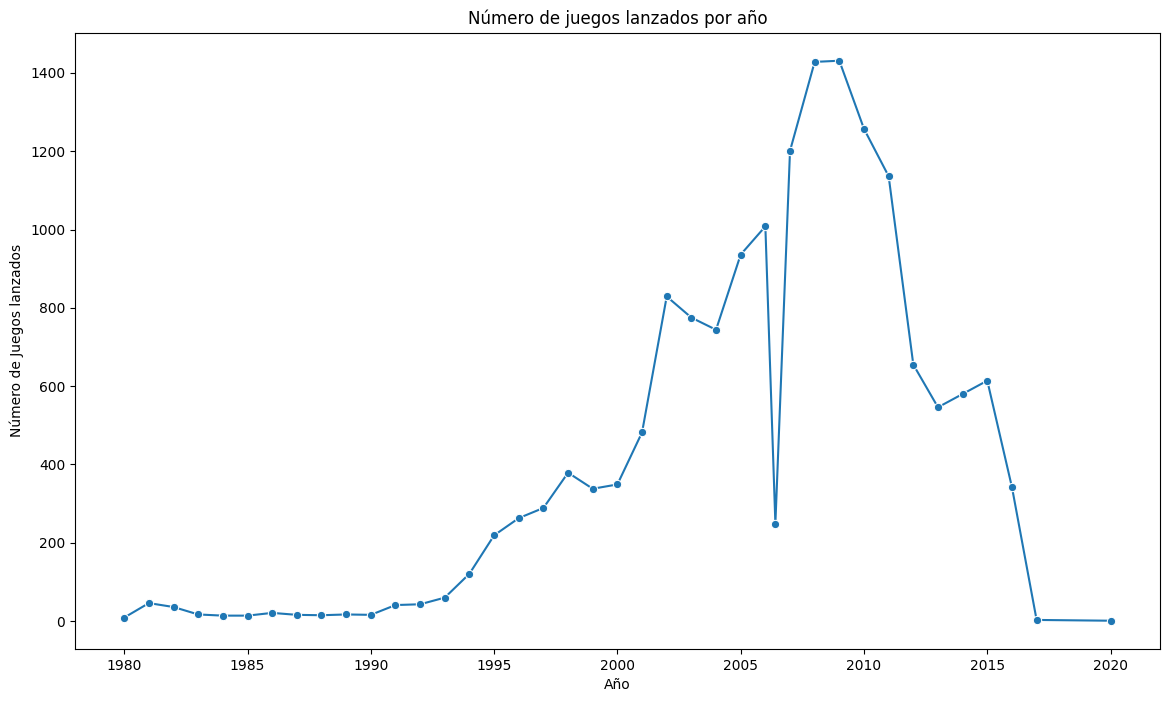

In [ ]:
# Filtrar años inválidos o faltantes
datos_validos_years = data.dropna(subset=['Year'])

# Contar el número de juegos lanzados por año
games_per_year = datos_validos_years['Year'].value_counts().sort_index()

# Convertir la Serie a un DataFrame
games_por_year_df = games_per_year.reset_index()
games_por_year_df.columns = ['Year', 'Number of Games']

# Crear el gráfico de líneas
plt.figure(figsize=(14, 8))
sns.lineplot(data=games_por_year_df, x='Year', y='Number of Games', marker='o')

# Añadir títulos y etiquetas
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Número de Juegos lanzados')

# Mostrar el gráfico
plt.show()




**Interpretación**

Se observa una clara evolución en la industria de los videojuegos:

- **1980-1990:** El número de lanzamientos es bajo y estable, con menos de 100 juegos por año.
- **1990-2000:** Se inicia un crecimiento progresivo, alcanzando cerca de 400 juegos anuales hacia finales de los 90.
- **2000-2010:** Hay un crecimiento acelerado, con picos significativos. El número de lanzamientos alcanza su máximo alrededor de 2008-2010, superando los 1400 juegos en un solo año.
- **2010-2020:** Después del pico, hay una caída pronunciada y sostenida en el número de lanzamientos, llegando a menos de 100 juegos por año hacia 2020.
- **Pico máximo:** El mayor número de lanzamientos se da entre 2008 y 2010.
- **Caída brusca:** Se observa una caída abrupta justo después del pico, y otra caída significativa alrededor de 2006.
- **Estabilidad baja:** Hacia 2020, la cantidad de lanzamientos vuelve a niveles similares a los de los años 80.

**Posibles Explicaciones**
- **Crecimiento de la industria:** El aumento hasta 2010 puede deberse al auge de consolas, PC y la expansión global de los videojuegos.
- **Factores de caída:** Las caídas pueden estar relacionadas con cambios tecnológicos, crisis económicas, saturación del mercado o cambios en los modelos de negocio.
- **Datos atípicos:** El descenso abrupto en 2006 podría deberse a un evento específico que afectó los lanzamientos ese año.


**Parte 4: Interpretación**
13. Conclusiones:
Basándote en tus análisis y visualizaciones, escribe un breve resumen (2-3 párrafos) con tus principales hallazgos. ¿Qué géneros son los más populares en términos de ventas? ¿Qué publicadores dominan el mercado? ¿Hay alguna tendencia interesante en las ventas regionales o a lo largo del tiempo que hayas notado?

- La distribución de la gráfica de ventas globales es fuertemente asimétrica a la derecha (sesgo positivo), lo que significa que la mayoría de los videojuegos venden poco, mientras que solo unos pocos alcanzan cifras de ventas muy altas.

- Los videojuegos de acción y deportes dominan el mercado global en términos de ventas, mientras que los géneros de estrategia, aventura y rompecabezas tienen una participación mucho menor.

- El gráfico de *corelación de ventas en Norteamérica y Europa* indica que, en general, existe una relación positiva, los productos con buenas ventas en una región tienden a vender bien en la otra, pero la corelación no es perfectamente lineal y hay que tener en cuenta que otros factores también pueden influir en las ventas.

- El gráfico de *Ventas globales totales por año para las 5 plataformas con más ventas* muestra claramente cómo las consolas de videojuegos tienen ciclos de vida bien definidos, con un auge de ventas seguido de una caída rápida a medida que son reemplazadas por nuevas generaciones. Destacan la **PS2** y la **Wii** por sus picos de ventas, mientras que la **DS** sobresale por su permanencia en el mercado.

- El gráfico de *Número de juegos lanzados por año* muestra el auge y declive de los lanzamientos de videojuegos tradicionales a lo largo de 40 años. El periodo de mayor crecimiento fue entre 2000 y 2010, seguido de una caída sostenida. Esto puede estar relacionado con cambios en la industria y la forma en que se distribuyen y contabilizan los juegos.